# Test Dataloader

In [1]:
from utils.data import build_dataset,build_xview_dataset, unwrap_collate_fn
from attrdict import AttrDict
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageDraw
from utils.fcos import fcos_resnet50_fpn
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor


/opt/conda/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
TRAIN_DATA_DIR='determined-ai-xview-coco-dataset/train_sliced_no_neg/train_images_300_02/'

dataset, num_classes = build_xview_dataset(image_set='val',args=AttrDict({
                                                'data_dir':TRAIN_DATA_DIR,
                                                'backend':'aws',
                                                'masks': None,
                                                }))

PATHS:  {'train': ('determined-ai-xview-coco-dataset/train_sliced_no_neg/train_images_300_02/', '/tmp/train_sliced_no_neg/train_300_02_1k.json'), 'val': ('determined-ai-xview-coco-dataset/train_sliced_no_neg/train_images_300_02/', '/tmp/train_sliced_no_neg/train_300_02_1k.json')}
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!
self.catIdtoCls:  {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 14, 14: 15, 15: 16, 16: 17, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 25, 25: 26, 26: 27, 27: 28, 28: 29, 29: 30, 30: 31, 31: 32, 32: 33, 33: 34, 34: 35, 35: 36, 36: 37, 37: 38, 38: 39, 39: 40, 40: 41, 41: 42, 42: 43, 43: 44, 44: 45, 45: 46, 46: 47, 47: 48, 48: 49, 49: 50, 50: 51, 51: 52, 52: 53, 53: 54, 54: 55, 55: 56, 56: 57, 57: 58, 58: 59, 59: 60}


In [3]:
dataset[0]

(tensor([[[0.4000, 0.3922, 0.3804,  ..., 0.3961, 0.4118, 0.4078],
          [0.4039, 0.4039, 0.4000,  ..., 0.4118, 0.4235, 0.4235],
          [0.3922, 0.4078, 0.4157,  ..., 0.4000, 0.4000, 0.4039],
          ...,
          [0.2157, 0.2157, 0.2078,  ..., 0.2784, 0.2745, 0.2745],
          [0.1843, 0.1804, 0.1804,  ..., 0.2784, 0.2745, 0.2706],
          [0.1647, 0.1647, 0.1765,  ..., 0.2784, 0.2706, 0.2667]],
 
         [[0.3529, 0.3451, 0.3333,  ..., 0.3647, 0.3765, 0.3725],
          [0.3569, 0.3569, 0.3529,  ..., 0.3804, 0.3882, 0.3882],
          [0.3451, 0.3608, 0.3686,  ..., 0.3686, 0.3647, 0.3686],
          ...,
          [0.1765, 0.1765, 0.1686,  ..., 0.2431, 0.2392, 0.2392],
          [0.1451, 0.1412, 0.1412,  ..., 0.2431, 0.2392, 0.2353],
          [0.1255, 0.1255, 0.1373,  ..., 0.2431, 0.2353, 0.2314]],
 
         [[0.3059, 0.2980, 0.2863,  ..., 0.3137, 0.3176, 0.3137],
          [0.3098, 0.3098, 0.3059,  ..., 0.3294, 0.3294, 0.3294],
          [0.2980, 0.3137, 0.3216,  ...,

In [4]:
{i:i+1 for i in dataset.coco.getCatIds()}

{0: 1,
 1: 2,
 2: 3,
 3: 4,
 4: 5,
 5: 6,
 6: 7,
 7: 8,
 8: 9,
 9: 10,
 10: 11,
 11: 12,
 12: 13,
 13: 14,
 14: 15,
 15: 16,
 16: 17,
 17: 18,
 18: 19,
 19: 20,
 20: 21,
 21: 22,
 22: 23,
 23: 24,
 24: 25,
 25: 26,
 26: 27,
 27: 28,
 28: 29,
 29: 30,
 30: 31,
 31: 32,
 32: 33,
 33: 34,
 34: 35,
 35: 36,
 36: 37,
 37: 38,
 38: 39,
 39: 40,
 40: 41,
 41: 42,
 42: 43,
 43: 44,
 44: 45,
 45: 46,
 46: 47,
 47: 48,
 48: 49,
 49: 50,
 50: 51,
 51: 52,
 52: 53,
 53: 54,
 54: 55,
 55: 56,
 56: 57,
 57: 58,
 58: 59,
 59: 60}

In [5]:
img, ann = dataset[0]
print(ann)
print(img.shape)
np.array(img, dtype=np.uint8).transpose(1,2,0).dtype

{'boxes': tensor([[ 67.,   0., 286., 106.]]), 'labels': tensor([49]), 'image_id': tensor([1]), 'area': tensor([23214]), 'iscrowd': tensor([0]), 'orig_size': tensor([300, 300]), 'size': tensor([300, 300])}
torch.Size([3, 300, 300])


dtype('uint8')

67.0 0.0 286.0 106.0


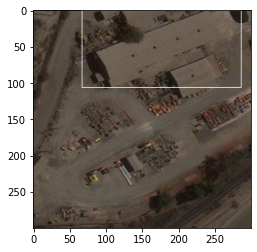

In [6]:
img = Image.fromarray(np.array(img*255, dtype=np.uint8).transpose(1,2,0))
draw = ImageDraw.Draw(img)
for a in ann['boxes']:
    x,y,x2,y2 = a.numpy()
    print( x,y,x2,y2)
    draw.rectangle([x,y,x2,y2])
    
plt.imshow(np.array(img)/255.)

In [7]:
# Load Model

In [16]:
def build_frcnn_model(num_classes):
    # load an detection model pre-trained on COCO
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

    # get the number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    model.min_size=800
    model.max_size=1333
    # RPN parameters
    model.rpn_pre_nms_top_n_train=2000
    model.rpn_pre_nms_top_n_test=1000
    model.rpn_post_nms_top_n_train=2000
    model.rpn_post_nms_top_n_test=1000
    model.rpn_nms_thresh=0.7
    model.rpn_fg_iou_thresh=0.7
    model.rpn_bg_iou_thresh=0.3
    model.rpn_batch_size_per_image=256
    model.rpn_positive_fraction=0.5
    model.rpn_score_thresh=0.0
    # Box parameters
    model.box_score_thresh=0.05
    model.box_nms_thresh=0.5
    model.box_detections_per_img=100
    model.box_fg_iou_thresh=0.5
    model.box_bg_iou_thresh=0.5
    model.box_batch_size_per_image=512
    model.box_positive_fraction=0.25
    return model

    return model

In [17]:
# model = fcos_resnet50_fpn(pretrained=False,num_classes=61)
model=build_frcnn_model(num_classes=61)
model.load_state_dict(torch.load('model.pth').state_dict())
_=model.eval()

In [18]:
def collate_fn(batch):
    return tuple(list(zip(*batch)))
data_loader_test = torch.utils.data.DataLoader(
        dataset, batch_size=1, sampler=None, num_workers=0, collate_fn=collate_fn)

In [19]:
images_t, targets_t= list(data_loader_test)[0]

In [20]:
images_t[0].shape

torch.Size([3, 300, 300])

In [21]:
# from time import time
cpu_device = torch.device('cpu')
# _,outputs = model(images_t,targets_t)
outputs = model(images_t)

# print(type(outputs[0]))
# print(outputs)
outputss = []
for t in outputs:
    outputss.append({k: v.to(cpu_device) for k, v in t.items()})
# model_time = time.time() - model_time
res = {target["image_id"].item(): output for target, output in zip(targets_t, outputss)}

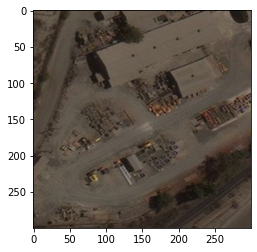

In [22]:
plt.imshow(images_t[0].permute(1,2,0).numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


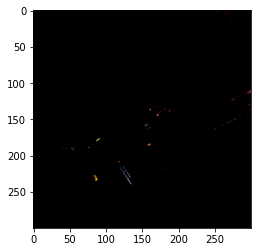

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


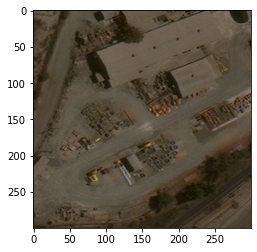

In [23]:

from torchvision.transforms import transforms
norm = transforms.Normalize(
    mean=[0.485, 0.456, 0.406],
    std=[0.229, 0.224, 0.225]
)
n = norm(images_t[0].clone())
plt.imshow(n.permute(1,2,0).numpy())
plt.show()
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.255],
    std=[1/0.229, 1/0.224, 1/0.255]
)
# inv_tensor = inv_normalize(tensor)
inv_tensor = inv_normalize(n.clone())
plt.imshow(inv_tensor.permute(1,2,0).numpy())
plt.show()

In [24]:
# i_test = (inv_tensor.permute((1,2,0))).numpy()
# print(i_test.dtype, i_test.mean(), (i_test).mean())
# plt.imshow(i_test)

In [25]:
# npimg = images_t[0].clone().numpy()
# npimg = np.transpose(npimg, (1,2,0))
# npimg = ((npimg * [0.229, 0.224, 0.225]) + [0.485, 0.456, 0.406])
# print((npimg).mean())
# plt.imshow(npimg, interpolation='nearest')

In [26]:
# img = Image.fromarray(np.array(img*255, dtype=np.uint8).transpose(1,2,0))
# draw = ImageDraw.Draw(img)
# for a in ann['boxes']:
#     x,y,x2,y2 = a.numpy()
#     print( x,y,x2,y2)
#     draw.rectangle([x,y,x2,y2])
    
# plt.imshow(img)

In [27]:
res[1].keys()

dict_keys(['boxes', 'labels', 'scores'])

95.07148 10.548014 277.9172 106.70998 0.5284021496772766 49
31.794731 2.3522758 281.31793 173.18036 0.4602818787097931 49
90.46375 43.136436 244.55067 132.58739 0.3166610896587372 49
151.1483 38.860447 270.09125 134.3044 0.3153652846813202 49
17.081142 18.15017 208.46434 230.49945 0.17508067190647125 49


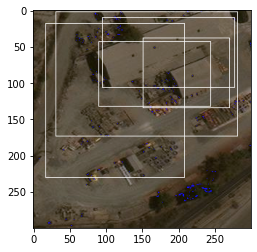

In [28]:
img = Image.fromarray((255.*inv_tensor.permute((1,2,0)).numpy()).astype(np.uint8))
draw = ImageDraw.Draw(img)
for ind,(b,s,l) in enumerate(zip(res[1]['boxes'],res[1]['scores'],res[1]['labels'])):
    # print(b.detach().numpy(), s.detach().numpy())
    x,y,x2,y2 = b.detach().numpy()
    print( x,y,x2,y2,s.item(),l.item())
    draw.rectangle([x,y,x2,y2])
    if ind > 3:
        break
    
plt.imshow(img)

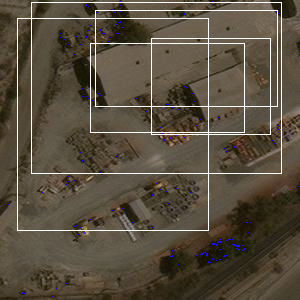

In [29]:
img

In [30]:
from torchvision.models.detection.transform import GeneralizedRCNNTransform

In [31]:
transform = GeneralizedRCNNTransform(800, 1333, image_mean, image_std, **kwargs)

NameError: name 'image_mean' is not defined